In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from word2vec import word2vec

In [18]:
from gensim.models import word2vec as gword2vec

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head(10)

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.00,0.00,0.00%,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.20,21.22,8.20%,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.00,0.00,0.00%,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.00,0.00,0.00%,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.00,0.00,0.00%,0.0,0.00
5,20120524,US-Market,applications in the cloud,0.0,0.00,0.00,0.00%,0.0,0.00
6,20120524,US-Market,project management with scrum,0.0,0.00,0.00,0.00%,0.0,0.00
7,20120524,US-Market,servers for businesses,0.0,0.00,0.00,0.00%,0.0,0.00
8,20120524,US-Market,android application developers,0.0,0.00,0.00,0.00%,0.0,0.00
9,20120524,US-Market,android app developers,1.0,0.66,23.31,8.60%,270.0,15.31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356054 entries, 0 to 356053
Data columns (total 9 columns):
Date                356054 non-null int64
Market              356054 non-null object
Keyword             355575 non-null object
Average.Position    353018 non-null float64
CPC                 353018 non-null float64
Clicks              353018 non-null float64
CTR                 353018 non-null object
Impressions         353018 non-null float64
Cost                353018 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 24.4+ MB


In [5]:
data.describe()

,Date,Average.Position,CPC,Clicks,Impressions,Cost
count,3.560540e+05,353018.000000,353018.000000,353018.000000,3.530180e+05,3.530180e+05
mean,2.012269e+07,0.611737,14.285071,439.052699,1.874365e+04,3.598259e+03
std,3.577676e+03,0.643839,37.858433,7559.532663,2.970826e+05,5.718301e+04
min,2.012052e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.012090e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,2.012102e+07,1.000000,1.100000,2.120000,1.290000e+02,8.070000e+00
75%,2.012122e+07,1.000000,12.100000,35.230000,1.571000e+03,3.749975e+02
max,2.013021e+07,12.000000,632.730000,441963.500000,1.566667e+07,3.269108e+06


In [20]:
data.Market.value_counts(normalize=True)

US-Market    0.651266
UK-Market    0.348734
Name: Market, dtype: float64

## Exploration of the Date column

This is the distribution of date values per year:

In [21]:
data['Year'] = data.Date.astype('str').apply(lambda x: x[:4]).astype('int')

In [22]:
data.Year.value_counts(normalize=True)

2012    0.812613
2013    0.187387
Name: Year, dtype: float64

This is the distribution of rows for different months in 2012. The dataset starts from May until December 2012.

In [24]:
data['Month'] = data.Date.astype('str').apply(lambda x: x[4:6]).astype('int')

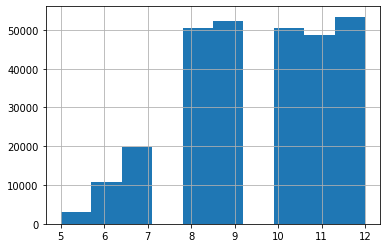

In [26]:
data.Month[data.Year == 2012].hist()

This is for 2013. Note that only January and February are in the dataset

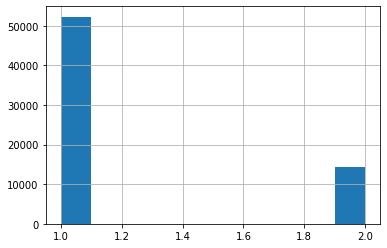

In [27]:
data.Month[data.Year == 2013].hist()

In [59]:
data.Date[data.Date < 20130000].astype('str').apply(lambda x: x[4:6]).value_counts()

12    53416
09    52302
08    50576
10    50489
11    48793
07    19872
06    10752
05     3134
Name: Date, dtype: int64

In [9]:
data.CTR.apply(lambda x: len(x)).value_counts()

TypeError: object of type 'float' has no len()

In [12]:
data.Market.value_counts(normalize=True)

US-Market    0.651266
UK-Market    0.348734
Name: Market, dtype: float64

In [15]:
data['Average.Position'].nunique()

98

In [36]:
data['Average.Position'].value_counts()

1.0     194682
0.0     148897
1.1       3210
1.2       1117
1.3        633
         ...  
10.3         2
10.7         2
9.8          1
9.3          1
10.8         1
Name: Average.Position, Length: 98, dtype: int64

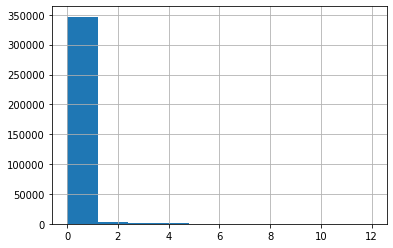

In [37]:
data['Average.Position'].hist()

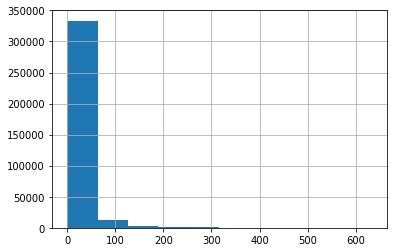

In [27]:
data.CPC.hist()

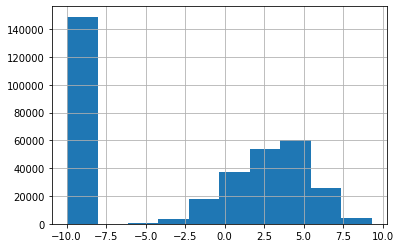

In [33]:
data.CPC.replace(to_replace=0.0, value=0.001).apply(np.log2).hist()

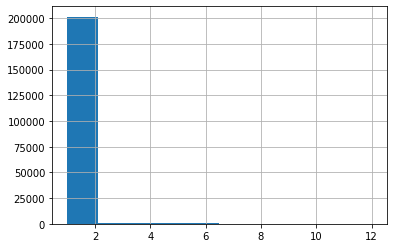

In [31]:
data['Average.Position'][data['Average.Position']>= 1.0].hist()